### Project 2: Wrangle and analyze data

In [107]:
# import libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

### Gathering data

### 1. twit_enhanced data

In [2]:
# upload csv twitter data
twit_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

### 2.  image_predictions.tsv data

In [12]:
# download data using request library
image_prediction_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [13]:
# Use requests to get for the data
r = requests.get(image_prediction_url)
r.status_code

200

In [14]:
# Download and save the response into a csv file locally

with open("image-predictions.tsv", mode='wb') as file:
    file.write(r.content)

In [15]:
# Read the data into a Pandas DataFrame
image_prediction = pd.read_csv("image-predictions.tsv", sep = '\t')

# Get the shape of the dataset: number of rows and columns
image_prediction.shape

(2075, 12)

- In the above line of code, the dimension of the data was (2075, 12). This is because the raw data was partitioned into columns based on sep = '\t'. 

- But, below you cas see that the column size is 1. This is because the data was considered as one column due to tab or space between the values. 

### 3. twitter api data
- N.B. I was not be able to dowload the twitter api tweet data. They didn't give me the developer account permission. Therefore, I used the tweet_json.txt data.

In [4]:
# Upload the tweet-json data
w = 'keyword'
with open('tweet_json.txt', 'r+') as file:
    lines = file.readlines()
data = [ ]
for line in lines:
    data.append(json.loads(line))
data_json = pd.DataFrame(data)

In [20]:
# Import the downloaded twitter_json.txt and read it line by line to extract tweet ID,
#retweet count, and favorite count:
tweetdata_list=[]
tweetdf_list=[]
with open('tweet_json.txt' , 'r') as myfile:
    for line in myfile:
        json_line = json.loads(line)
        tweetdata_list.append(json_line)
        

        
for i in tweetdata_list:
    tweet_id = i['id']
    retweet_count = i['retweet_count']
    favorite_count = i['favorite_count']
    tweetdf_list.append({'id':tweet_id , 'retweet_count': retweet_count , 'favorite_count': favorite_count})
    


### Data assessment and cleaing

In [22]:
# Copy the data for data assesment and cleaning to keep the original data
twit_enhanced_clean = twit_enhanced.copy()
image_pred_clean = image_prediction.copy()
tweet_json_clean = tweetdf_json.copy()

In [27]:
# dimensions of the three dataset
# dimension of twit_enhanced_clean data
twit_enhanced_clean.shape

(2356, 17)

In [28]:
# dimension of image_pred_clean data
image_pred_clean.shape

(2075, 12)

In [29]:
# dimension of tweet_json_clean databsa
tweet_json_clean.shape

(2354, 3)

- Having the dimension of the three dataset, there you can understand the datasets doesn't have the same row and column
- twit_enhanced_clean data obtained the largest recored and column.
- this row and column characteristics give us how the data looks and consider for further assessment

In [31]:
# data types and entries
twit_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- twit_enhanced_clean dataset has twit_id and dog names with 2356 records, less number of retweets around 181 records and other records.
- the data owns float, int, and object data types

In [32]:
# data types and entries (.info)
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- image_pred_clean data set characterised by int, object, float, and bool data types.
- all the columns has 2075 records

In [33]:
# tweet_json_clean data: data types and entries
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


- this tweet_json_clean dataset has 3 columns and all have the same number of records (2354)
- all the records are int data types

In [35]:
# the first two rows of the dataset
twit_enhanced_clean.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

#### data quality issues
1. twit_enhanced_clean data has NaN records
2. Unnecessary columns are included such as in_reply_to_status_id
3. some the values of the records in this dataset column rating_enumerator exceeds from the expected value 15. eg. index 695, index 763, and index 1712.
4. The three dataset has different row and column dimension

#### data tidiness issues
1. twit_enhanced_clean data has individual columns (dog stage: doggo, floofer, pupper, and puppo) rather has to be shown within a single column
2. image_pred_clean data some of the column names are inappropriate (eg. p1, p1_conf, etc)

In [36]:
# few records of the dataset image_pred_clean
image_pred_clean.head(2)


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

In [38]:
# Check whether number of tweets in twitter_archive == number of tweets that have images in img_pred:
# As rating of dogs in each tweet mainly depends on image.

twit_enhanced_clean['tweet_id'].size == twit_enhanced_clean.isin(image_pred_clean['tweet_id']).sum()['tweet_id']

False

- Based on the above code the two dataset have't the same tweet_id record.
- The same unique id's should be identified or filtered

In [40]:
# filter twitter_archive to only have tweets having images in img_pred dataframe:
twit_enhanced_clean = twit_enhanced_clean[twit_enhanced_clean['tweet_id'].isin(image_pred_clean['tweet_id'].unique())]
twit_enhanced_clean.shape

(1532, 17)

- In this regard, the number of tweet_id that found in the two dataset are row (1532) and column (17)

In [41]:
# Filter retweets from twit_enhanced_clean and keep only have original tweets
twit_enhanced_clean = twit_enhanced_clean[twit_enhanced_clean['retweeted_status_id'].isnull()]

In [42]:
# Check all tweets in twit_enhanced_clean data taht doesn't have retweet_id
# Note that retweet_id include only unique value "NAN"
twit_enhanced_clean['retweeted_status_id'].unique()

array([nan])

- Now display the columns of twit_enhanced_clean data to drop those retweet columns
- This way we will obtain the original tweets. The code below will give this result

In [43]:
# Show out columns' names for twit_enhanced_clean data
twit_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [44]:
# Remove unnecessary columns that will not be used in further analysis, this also include retweets 
# such as : [in-reply-to-status-id , retweet_id, retweeted_status_user_id]

drop_list = ['in_reply_to_status_id' , 'in_reply_to_user_id' , 'source' , 'retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp' ,'expanded_urls','name' ]

twit_enhanced_clean.drop(drop_list , inplace =True , axis=1)

In [45]:
# Check whether the in-appropriate columns removed or not: dimension of the data
twit_enhanced_clean.shape

(1477, 9)

- So far the data cleaning for twit_enhanced_clean data has been changing from (2356, 17) to (1532, 17), and finally here (1477, 9)

In [46]:
# twit_enhanced_clean: display few rows
twit_enhanced_clean.head(2)

tweet_id                  timestamp  \
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   

                                                text  rating_numerator  \
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   

   rating_denominator doggo floofer pupper puppo  
1                  10  None    None   None  None  
2                  10  None    None   None  None

In [47]:
# Repace "None" values in dog stage ['doggo', 'floofer', 'pupper', 'puppo']  columns by balnk text'':
twit_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']]= twit_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None' , '')

In [49]:
# merging dog stage columns (doggo, floofer, pupper, puppo)in one column, dog_stage
# merging into one column increase tidiness of the data
twit_enhanced_clean['dog_stage'] = twit_enhanced_clean['doggo'] +twit_enhanced_clean['floofer'] + twit_enhanced_clean['pupper'] + twit_enhanced_clean['puppo']

In [50]:
# Test that dog stage column has been created and check unique values within it
twit_enhanced_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [52]:
# Replace blank text value in stage column by np.nan
twit_enhanced_clean['dog_stage'] = twit_enhanced_clean['dog_stage'].replace('', np.nan)

In [53]:
# check dog_stage column is being created
twit_enhanced_clean.head(2)

tweet_id                  timestamp  \
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   

                                                text  rating_numerator  \
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   

   rating_denominator doggo floofer pupper puppo stage dog_stage  
1                  10                              NaN       NaN  
2                  10                              NaN       NaN

In [68]:
# check unique values within dog_stage column 
twit_enhanced_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [70]:
# Drop ['doggo', 'puppo', 'pupper', 'floofer'] columns and also column 'stage'
drop_col_list = ['doggo', 'puppo', 'pupper', 'floofer']
twit_enhanced_clean.drop(drop_col_list , axis=1 , inplace= True)

KeyError: "['doggo' 'puppo' 'pupper' 'floofer'] not found in axis"

In [63]:
# check whether the column has been removed or not
twit_enhanced_clean.head()

tweet_id                  timestamp  \
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   
5  891087950875897856  2017-07-29 00:08:17 +0000   
6  890971913173991426  2017-07-28 16:27:12 +0000   

                                                text  rating_numerator  \
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
4  This is Franklin. He would like you to stop ca...                12   
5  Here we have a majestic great white breaching ...                13   
6  Meet Jax. He enjoys ice cream so much he gets ...                13   

   rating_denominator stage dog_stage  
1                  10   NaN       NaN  
2                  10   NaN       NaN  
4                  10   NaN       NaN  
5                  10   NaN       NaN  
6                  10   NaN       NaN

In [71]:
drop_col_list = ['stage']
twit_enhanced_clean.drop(drop_col_list , axis=1 , inplace= True)

In [72]:
# assessmnformation aout the cleaned twit_enhanced_clean data
twit_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 2355
Data columns (total 6 columns):
tweet_id              1462 non-null int64
timestamp             1462 non-null object
text                  1462 non-null object
rating_numerator      1462 non-null int64
rating_denominator    1462 non-null int64
dog_stage             228 non-null object
dtypes: int64(3), object(3)
memory usage: 80.0+ KB


In [73]:
#summary of rating_numerator
twit_enhanced_clean['rating_numerator'].describe()

count    1462.000000
mean       10.988372
std         2.451836
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

In [74]:
# summary of rating_denominator
twit_enhanced_clean['rating_denominator'].describe()

count    1462.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [75]:
# Identify all tweets that have "rating_denominator" != 10 
wrong_denominator= twit_enhanced_clean[twit_enhanced_clean['rating_denominator'] != 10].index

# Drop all tweets that have "rating_denominator" != 10 
twit_enhanced_clean.drop(wrong_denominator , inplace = True )

In [76]:
# checking the rating_denominator being above the expected value
twit_enhanced_clean

tweet_id                  timestamp  \
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
...                  ...                        ...   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                   text  rating_numerator  \
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
4     This is Franklin. He would like you to stop ca...                12   
5     Here we have a majestic great white breaching ...                13   
6     Meet Jax. He enjoys ice cream so much he gets ...                13   
...                                                 ...               ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                 5   
2352  This is a purebred Piers Morgan. Loves to Netf...                 6   
2353  Here is a very happy pup. Big fan of well-main...                 9   
2354  This is a western brown Mitsubishi terrier. Up...                 7   
2355  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator dog_stage  
1                     10       NaN  
2                     10       NaN  
4                     10       NaN  
5                     10       NaN  
6                     10       NaN  
...                  ...       ...  
2351                  10       NaN  
2352                  10       NaN  
2353                  10       NaN  
2354                  10       NaN  
2355                  10       NaN  

[1462 rows x 6 columns]

In [77]:
# assess tweets with rating_numerator more than 15
twit_enhanced_clean[twit_enhanced_clean['rating_numerator'] > 15]

tweet_id                  timestamp  \
695   786709082849828864  2016-10-13 23:23:56 +0000   
763   778027034220126208  2016-09-20 00:24:34 +0000   
1712  680494726643068929  2015-12-25 21:06:00 +0000   

                                                   text  rating_numerator  \
695   This is Logan, the Chow who lived. He solemnly...                75   
763   This is Sophie. She's a Jubilant Bush Pupper. ...                27   
1712  Here we have uncovered an entire battalion of ...                26   

      rating_denominator dog_stage  
695                   10       NaN  
763                   10    pupper  
1712                  10       NaN

In [79]:
# check for tweets that have rating_numerator 75 (index - 695):
twit_enhanced_clean[twit_enhanced_clean['rating_numerator'] > 15].loc[695,'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [80]:
# fix rating numerator for previous tweet (index 695):
twit_enhanced_clean.loc[695 , 'rating_numerator'] = 9.75

In [81]:
# check for tweets that have rating_numerator 27 (index - 763):
twit_enhanced_clean[twit_enhanced_clean['rating_numerator'] > 15].loc[ 763,'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [82]:
# fix rating numerator for previous tweet (index 763):
twit_enhanced_clean.loc[763 , 'rating_numerator'] = 11.27

In [83]:
# check for tweets that have rating_numerator 27 (index - 1712):
twit_enhanced_clean[twit_enhanced_clean['rating_numerator'] > 15].loc[1712,'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [84]:
# fix rating numerator for previous tweet (index 1712):
twit_enhanced_clean.loc[1712 , 'rating_numerator'] = 11.26

In [85]:
# Check that tweets having rating_numerator more than 15 has been fixed:
twit_enhanced_clean[twit_enhanced_clean['rating_numerator'] > 15]

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, dog_stage]
Index: []

- There is tweets that have rating (rating_numerator) more than 15
- This can also be shown by the summary of rating_numerator below

In [87]:
twit_enhanced_clean['rating_numerator'].describe ()

count    1462.000000
mean       10.922900
std         1.695307
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

- Based on the above summary the maximum rating was 14

In [88]:
# Drop rating_denominator column as it will not be useful in any future analysis:
twit_enhanced_clean.drop('rating_denominator' , axis= 1, inplace= True)

In [89]:
# Check that rating_denominator column has been removed:
twit_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 2355
Data columns (total 5 columns):
tweet_id            1462 non-null int64
timestamp           1462 non-null object
text                1462 non-null object
rating_numerator    1462 non-null float64
dog_stage           228 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 108.5+ KB


In [90]:
# check the column of image_pred_clean data
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [91]:
# Remove unnecessary columns such as [jpg_url, 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'] from image_pred_clean data
image_drop_cols = ['jpg_url','img_num', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_pred_clean.drop(image_drop_cols , axis=1 , inplace =True)

In [92]:
# check those removed columns from image_pred_clean dataframe
image_pred_clean.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

In [93]:
# Rename columns of image_pred_clean dataframe to be more descriptive:
new_names = {'p1': 'breed' , 'p1_conf': 'pred_confidence' , 'p1_dog': 'is_dog' }
image_pred_clean.rename(columns= new_names , inplace =True)

In [94]:
# check the renamed columns
image_pred_clean.columns

Index(['tweet_id', 'breed', 'pred_confidence', 'is_dog'], dtype='object')

In [95]:
# display a summary info about tweet_json_clean data
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [96]:
# Rename the id column of tweet_json_clean data
new_name = {'id' : 'tweet_id'}
tweet_json_clean.rename(columns= new_name, inplace=True)

In [97]:
# check the name of the new column
tweet_json_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

- At this stage the 'tweet_id' is one of the common column of the three dataset.
- Therefore, these datasets has to be merged together to conduct analysis

In [99]:
# Merge twit_enhanced_clean with image_pred_clean dataset
new_df = twit_enhanced_clean.merge(image_pred_clean ,on='tweet_id' ,  how= 'inner')

In [100]:
# Merge new_df dataset with tweet_json_clean data to a single dataset that includes all the three datasets for analysis
df_all_three = new_df.merge(tweet_json_clean , on= 'tweet_id' , how='inner')

In [101]:
# check the merged sample data
df_all_three.sample(5)

tweet_id                  timestamp  \
590  747963614829678593  2016-06-29 01:23:16 +0000   
228  828011680017821696  2017-02-04 22:45:42 +0000   
706  720043174954147842  2016-04-13 00:17:25 +0000   
444  778286810187399168  2016-09-20 17:36:50 +0000   
808  705475953783398401  2016-03-03 19:32:29 +0000   

                                                  text  rating_numerator  \
590  PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...              10.0   
228  Say hello to Brutus and Jersey. They think the...              11.0   
706  This is Neptune. He's a Snowy Swiss Mountain F...              11.0   
444  This is Stanley. He has too much skin. Isn't h...              11.0   
808  Say hello to Zara. She found a sandal and coul...              12.0   

    dog_stage                           breed  pred_confidence  is_dog  \
590    pupper                          kelpie         0.307672    True   
228       NaN  American_Staffordshire_terrier         0.936662    True   
706       NaN                         Samoyed         0.954517    True   
444       NaN                     Boston_bull         0.322070    True   
808       NaN                golden_retriever         0.908784    True   

     retweet_count  favorite_count  
590           2444            6397  
228           2451           11411  
706           2253            5332  
444           3836           11576  
808           1045            3231

### Data storing, analyzing, and visualization
#### The new cleaned data will be saved

In [102]:
# stroring the cleaned dataset
df_all_three.to_csv('twitter_archive_master.csv', index = False)

In [103]:
# check thew dataframe
df_all_three.head()

tweet_id                  timestamp  \
0  892177421306343426  2017-08-01 00:17:27 +0000   
1  891815181378084864  2017-07-31 00:18:03 +0000   
2  891327558926688256  2017-07-29 16:00:24 +0000   
3  891087950875897856  2017-07-29 00:08:17 +0000   
4  890971913173991426  2017-07-28 16:27:12 +0000   

                                                text  rating_numerator  \
0  This is Tilly. She's just checking pup on you....              13.0   
1  This is Archie. He is a rare Norwegian Pouncin...              12.0   
2  This is Franklin. He would like you to stop ca...              12.0   
3  Here we have a majestic great white breaching ...              13.0   
4  Meet Jax. He enjoys ice cream so much he gets ...              13.0   

  dog_stage                     breed  pred_confidence  is_dog  retweet_count  \
0       NaN                 Chihuahua         0.323581    True           6514   
1       NaN                 Chihuahua         0.716012    True           4328   
2       NaN                    basset         0.555712    True           9774   
3       NaN  Chesapeake_Bay_retriever         0.425595    True           3261   
4       NaN               Appenzeller         0.341703    True           2158   

   favorite_count  
0           33819  
1           25461  
2           41048  
3           20562  
4           12041

In [104]:
# check the summary of the dataframe
df_all_three.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 10 columns):
tweet_id            1462 non-null int64
timestamp           1462 non-null object
text                1462 non-null object
rating_numerator    1462 non-null float64
dog_stage           228 non-null object
breed               1462 non-null object
pred_confidence     1462 non-null float64
is_dog              1462 non-null bool
retweet_count       1462 non-null int64
favorite_count      1462 non-null int64
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 115.6+ KB


### Insights about the three datasets

1. The number of records (unique records) based on tweet_id has dropped significantly to 1462. In this regard, data assessment and cleaning has played a major role
2. Un-necessary columns/records in these dataset were recognized. The purpose of the dataset is clearly determines which column to remove. 
3. Despite the data gathering mechanisms are different, maintaining a common data description or id is veru crucial

In [105]:
# check the number of breeds
df_all_three['breed'].value_counts()[0:10]

golden_retriever      135
Labrador_retriever     92
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
toy_poodle             38
Pomeranian             38
malamute               29
Name: breed, dtype: int64

### Visualization of cleaned data: df_all_three

#### Topic: Which breed is the most common in this dataset?

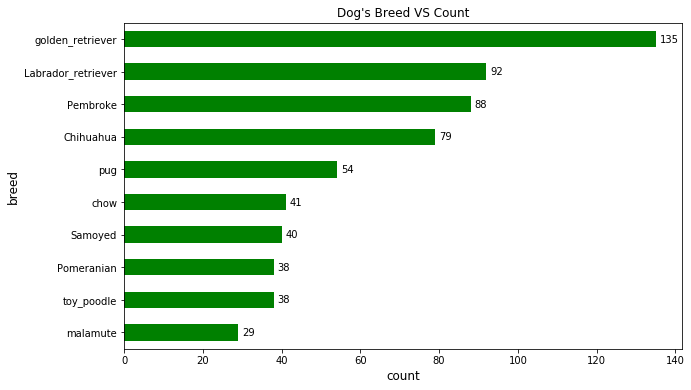

In [108]:
# Plot most common 10 breeds:
plt.figure(figsize=(10,6))
df_all_three['breed'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='green')

# Set x_label, y_label and title:
plt.xlabel('count',size=12)
plt.ylabel('breed', size=12)
plt.title('Dog\'s Breed VS Count' , size=12)

# Set x & y positions to add text over each bar:
x = df_all_three['breed'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')


#### Result analysis
- The most common breed in this dataset was golden_retriever, which constitutes 135 and followed by Labrador_retriever (92) and Pembroke (88).
- The list breed in the above 10 most commen dog breed was malamute. Malamute posses 29.
